In [84]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def find_translation(image1, image2):
    #image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    

    #image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    # Use cross-correlation to find the translation
    result = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)

    min_val,max_val,min_loc, max_loc = cv2.minMaxLoc(result)
    print("Minimum correlation value:", min_val)
    print("Maximum correlation value:", max_val)
    shift_x = max_loc[0]
    #plt.figure()
    #print(result)
    #plt.figure()
    #plt.imshow(image2)
    print((min_loc,max_loc))
    return shift_x

def stack_images_along_trajectory(image_folder, overlap_percent=0.4):
    # Load images from the specified folder
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])
    images = [cv2.imread(os.path.join(image_folder, file)) for file in image_files]

    # Determine the overlap region size
    overlap_size = int(images[0].shape[1] * overlap_percent)

    # Initialize the stitched image with the first image
    stitched_image = images[0]

    # Iterate over the remaining images
    for i in range(1, len(images)):
        # Extract overlapping regions

        overlap_region1 = stitched_image[:, -overlap_size:]
        print(overlap_region1.shape)
        overlap_region2 = images[i][:, :]
        print(overlap_region2.shape)
        plt.figure()
        plt.imshow(overlap_region2)

        # Find the translation (shift)
        shift_x = find_translation(overlap_region1, overlap_region2)


        # Shift the current image
        translation_matrix = np.float32([[1, 0, -shift_x], [0, 1, 0]])
        shifted_image = cv2.warpAffine(images[i], translation_matrix, (images[i].shape[1], images[i].shape[0]))
        #plt.imshow(shifted_image)
        # Stack the shifted image onto the stitched image
        stitched_image = np.hstack((stitched_image[:, :-overlap_size], shifted_image))

    return stitched_image

(480, 256, 3)
(480, 640, 3)
Minimum correlation value: -0.12370503693819046
Maximum correlation value: 0.653544545173645
((52, 0), (249, 0))
(480, 256, 3)
(480, 640, 3)
Minimum correlation value: -0.3704373240470886
Maximum correlation value: 0.07591481506824493
((328, 0), (56, 0))
(480, 256, 3)
(480, 640, 3)
Minimum correlation value: -0.24419352412223816
Maximum correlation value: 0.18339920043945312
((384, 0), (115, 0))
(480, 256, 3)
(480, 640, 3)
Minimum correlation value: -0.1327560693025589
Maximum correlation value: 0.17972728610038757
((182, 0), (38, 0))
(480, 256, 3)
(480, 640, 3)
Minimum correlation value: -0.1126011535525322
Maximum correlation value: 0.3116809129714966
((263, 0), (347, 0))
(480, 256, 3)
(480, 640, 3)
Minimum correlation value: 1.0
Maximum correlation value: 1.0
((0, 0), (0, 0))
(480, 256, 3)
(480, 640, 3)
Minimum correlation value: -0.030924731865525246
Maximum correlation value: 0.7552406787872314
((10, 0), (364, 0))


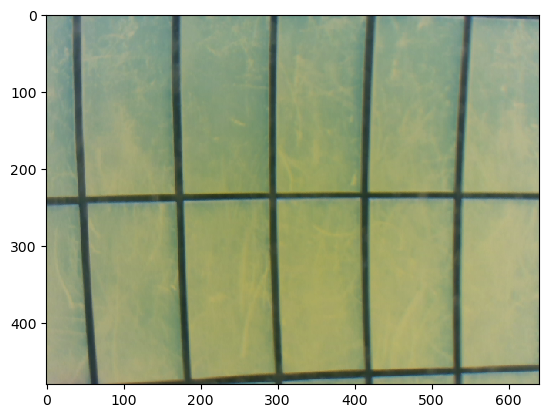

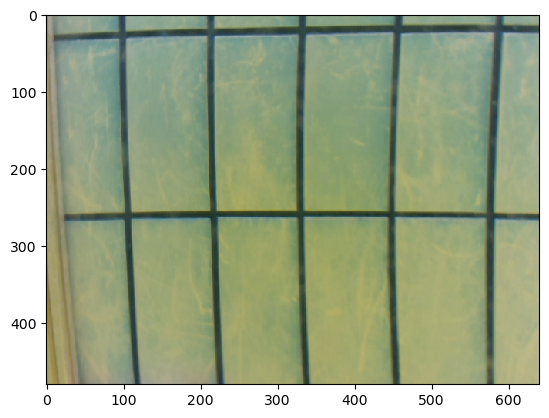

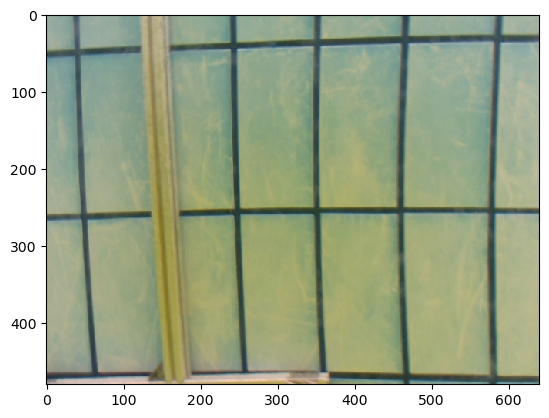

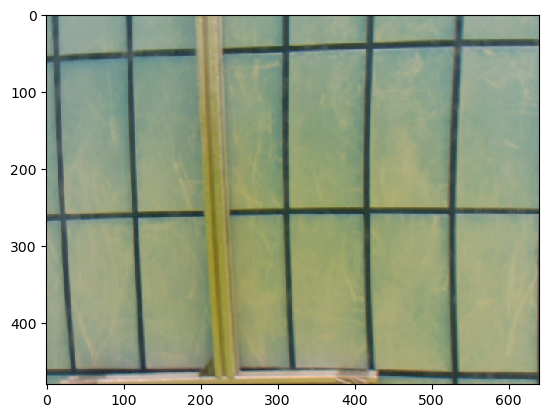

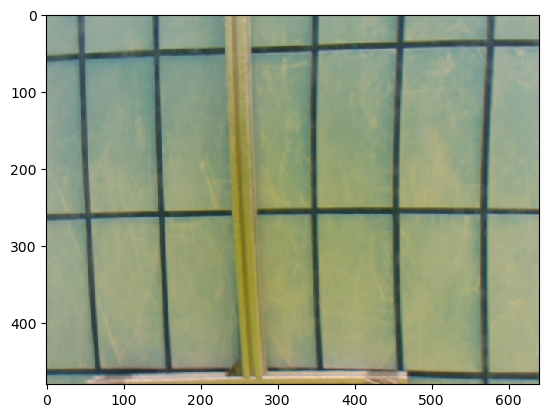

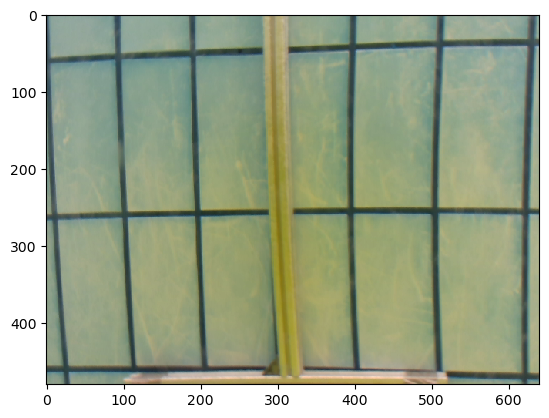

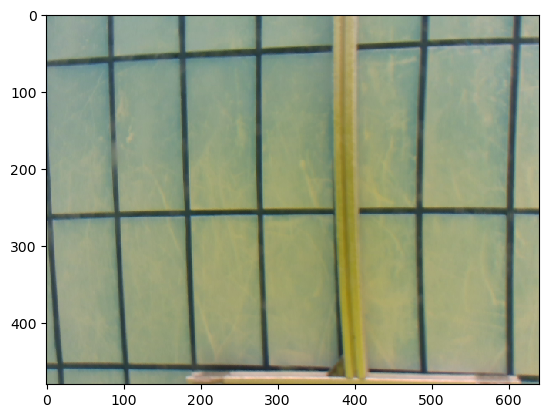

In [89]:
image_folder = '/home/uwr/Desktop/2023_UWR/Analysis/processed_data/Nov_21/3_reduced'
stitched_result = stack_images_along_trajectory(image_folder)

# Display the result


In [90]:
cv2.imwrite("result.png",stitched_result)

True

In [77]:
plt.imshow(overlap_region2)

NameError: name 'overlap_region2' is not defined